In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [14]:
# Input Data
β = 0.0065
Λ = 5e-5
λ = 0.0766
ρ = 1.01*β
n0 = 1e6
c0 = β*n0/(λ*Λ)
1/λ

13.054830287206267

In [15]:
# Time Constants
A = 1
B = λ*(1-(ρ-β)/(λ*Λ))
C = -1*(λ*(ρ-β)/Λ + λ*β/Λ)

ω1 = (-B + np.sqrt(B**2 - 4*A*C))/(2*A)
ω2 = (-B - np.sqrt(B**2 - 4*A*C))/(2*A)
T = 1/ ω1
print(f"B = {B:10.2f} \nC = {C:10.2f}")
print(f"ω1 = {ω1:10.2e} 1/s\nω2 = {ω2:10.2e} 1/s")
print(f"T = {T:10.2e} s")
β/(ρ*λ)

B =      -1.22 
C =     -10.06
ω1 =   3.84e+00 1/s
ω2 =  -2.62e+00 1/s
T =   2.60e-01 s


12.92557454178838

In [16]:
# Coefficients
a1 = (ρ*n0/Λ - n0*ω2)/(ω1-ω2)
a2 = n0 - a1
b1 = (-β*n0*ω2/(λ*Λ))/(ω1-ω2)
b2 = β*n0/(λ*Λ) - b1
a1, a2, b1, b2
print(f"a1 = {a1:10.2e}  \na2 = {a2:10.2e}")
print(f"b1 = {b1:10.2e}  \nb2 = {b2:10.2e}")
print(a1/n0)

a1 =   2.07e+07  
a2 =  -1.97e+07
b1 =   6.88e+08  
b2 =   1.01e+09
20.731495387582367


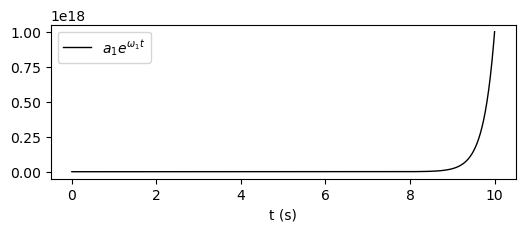

In [17]:
times = np.linspace(0, 10, 1000)
n = lambda t: a1*np.exp(ω1*t)+a2*np.exp(ω2*t)
c = lambda t: b1*np.exp(ω1*t)+b2*np.exp(ω2*t)

n1 = lambda t: a1*np.exp(ω1*t)
n2 = lambda t: -a2*np.exp(ω2*t)

n_asy = lambda t: a1*np.exp(ω1*t)

plt.figure(figsize=(6,2))
plt.plot(times, n(times)/n(0), 'k', lw=1)#, times, n_asy(times))
plt.xlabel("t (s)")
plt.legend(["$a_1 e^{\omega_1 t}$", "$a_2 e^{\omega_2 t}$", "$n(t)$"])

In [235]:
def get_sol(ρ):
    β = 0.0065
    Λ = 5e-5
    λ = 0.0766
    #ρ =  0.5*β
    n0 = 1e6
    c0 = β*n0/(λ*Λ)
    # Time Constants
    A = 1
    B = λ*(1-(ρ-β)/(λ*Λ))
    C = -1*(λ*(ρ-β)/Λ + λ*β/Λ)
    ω1 = (-B + np.sqrt(B**2 - 4*A*C))/(2*A)
    ω2 = (-B - np.sqrt(B**2 - 4*A*C))/(2*A)
    print(f"ω1 = {ω1:10.1e} 1/s\nω2 = {ω2:10.1f} 1/s")
    a1 = (ρ*n0/Λ - n0*ω2)/(ω1-ω2)
    a2 = n0 - a1
    b1 = (-β*n0*ω2/(λ*Λ))/(ω1-ω2)
    b2 = β*n0/(λ*Λ) - b1
    n = lambda t: a1*np.exp(ω1*t)+a2*np.exp(ω2*t)
    c = lambda t: b1*np.exp(ω1*t)+b2*np.exp(ω2*t)
    return n, c

In [236]:
t = np.linspace(0, 2, 1000)

ω1 =    4.0e-03 1/s
ω2 =     -123.6 1/s
ω1 =    8.5e-03 1/s
ω2 =     -117.1 1/s
ω1 =    1.9e-02 1/s
ω2 =     -104.1 1/s
ω1 =   -3.6e-03 1/s
ω2 =     -136.6 1/s
ω1 =   -7.0e-03 1/s
ω2 =     -143.1 1/s
ω1 =   -1.3e-02 1/s
ω2 =     -156.1 1/s
ω1 =   -7.5e-02 1/s
ω2 =    -6045.0 1/s


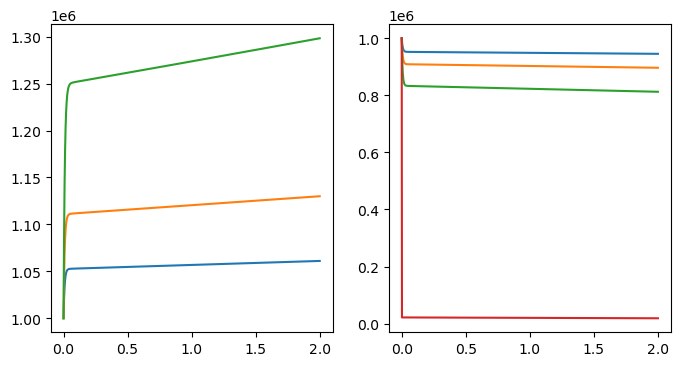

In [237]:
fig, (axL, axR) = plt.subplots(1,2, figsize=(8,4))

axL.plot(t, get_sol(0.05*β)[0](t))
axL.plot(t, get_sol(0.1*β)[0](t))
axL.plot(t, get_sol(0.2*β)[0](t))
#axL.plot(t, get_sol(0.5*β)[0](t))



axR.plot(t, get_sol(-0.05*β)[0](t))
axR.plot(t, get_sol(-0.1*β)[0](t))
axR.plot(t, get_sol(-0.2*β)[0](t))
axR.plot(t, get_sol(-45.5*β)[0](t))
# axR.plot(t, get_sol(-1.*β)[0](t))
# axR.plot(t, get_sol(-10.*β)[0](t))
# axR.plot(t, get_sol(-20.*β)[0](t))
# axR.plot(t, get_sol(-100.*β)[0](t))

In [200]:
get_sol(-45.5*β)[0](1.0)

19952.911988672473

ω1 =    7.6e-03 1/s
ω2 =     -118.4 1/s


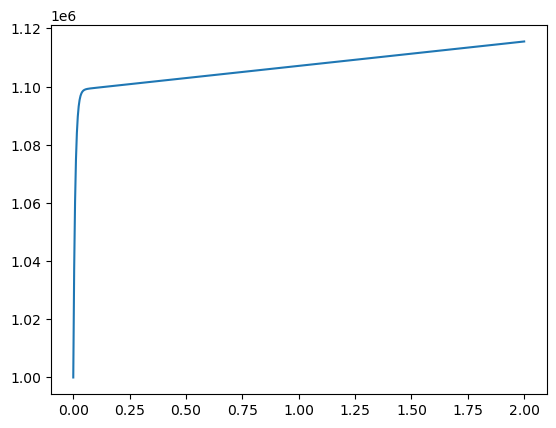

In [240]:
plt.plot(t, get_sol(0.09*β)[0](t))

In [317]:
6/np.log(1.4/1.25)

52.94334778301036

In [318]:
1/ω1

52.26738922905004

In [320]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

betas = np.array([0.00021, 0.00142, 0.00128, 0.00257, 0.00075, 0.00027])
thalfs = np.array([56, 23, 6.2, 2.3, 0.61, 0.23])
lambdas = np.log(2)/thalfs
print(lambdas)
one_over_lambda = 1/sum(betas) * sum(betas/lambdas)
lambda_avg = 1/one_over_lambda
lambda_avg

n0 = 1e8
Lambda = 5e-5

def f(y, t, rho, betas, lambdas, Lambda):
    n, C = y[0], y[1:] 
    beta = sum(betas)
    dydt = np.zeros(7)
    dydt[0] = ((rho(t)-beta)/Lambda)*n + sum(C*lambdas)
    dydt[1:] = -C*lambdas + betas*n/Lambda
    return dydt

y0 = np.zeros(7)
y0[0] = n0
y0[1:] = betas * n0 / (lambdas * Lambda)

def solve_it(rho, scale="linear", tmax=5, return_vals = False):
    
    times = np.linspace(0, tmax, 10000)
    
    y = odeint(f, y0, times, args=(rho, betas, lambdas, Lambda))
    n = y[:, 0]
    C = y[:, 1:]
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))
    for i in range(6):
        axes[1].plot(times, C[:, i], label=f"$C_{{{i+1}}}(t)$")
    plt.xlabel("$t$ [s]")
    plt.yscale("log")
    axes[1].legend();
    axes[0].plot(times, n, label="$n(t)$")
    axes[0].set_ylabel("$n(t)$")
    axes[0].set_xlabel("$t$ [s]")
    axes[0].set_yscale(scale)
    axes[1].set_yscale(scale)
    axes[0].grid(True, which="both", ls="-")
    plt.tight_layout();
    
    if return_vals:
        return n, C, times

[0.01237763 0.03013683 0.11179793 0.30136834 1.13630685 3.01368339]


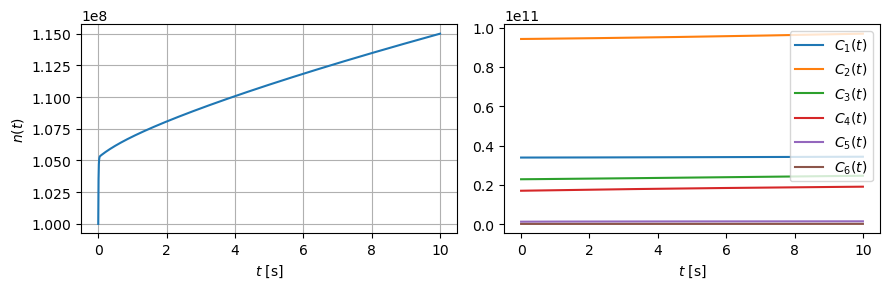

In [346]:
solve_it(rho=lambda t: 0.05*sum(betas), tmax=10, scale="linear")

In [347]:
T = 52.9

In [348]:
(1/T)*(Lambda+sum(T*betas/(1+T*lambdas)))

0.0010259924055356355

In [349]:
0.001/sum(betas)

0.15384615384615383

In [350]:
sum(betas)/T/sum(betas/lambdas)

0.0014487878751504005

In [381]:
(.0065-1.25*0.0065)/(-1.25)

0.0013000000000000004